In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot
import re
import matplotlib
matplotlib.font_manager._rebuild()

matplotlib.rc("font",family="SimHei")



In [2]:
df = pd.read_csv('java.csv',sep=",")
df.head()

,职位,工作地址,公司全称,薪水,学历,工作经验,行业标签
0,Java,上海·浦东新区·陆家嘴,蚂蚁金服,15-25K,本科,在校/应届,互联网
1,java研发工程师,上海·浦东新区·联洋,阿里巴巴集团,18-30K·13薪,本科,在校/应届,互联网
2,中间件java研发工程师,上海·浦东新区·陆家嘴,蚂蚁金服,20-30K·20薪,本科,在校/应届,移动互联网
3,蚂蚁金服大安全Java研发工程师,上海·浦东新区·陆家嘴,蚂蚁金服,20-35K·17薪,本科,在校/应届,互联网
4,Java,上海·浦东新区·张江,兴业数金,12-15K·17薪,本科,在校/应届,互联网


In [3]:
offer = df['薪水']

In [4]:
yearOfferMin=pd.Series(dtype=np.float64)
yearOfferMax=pd.Series(dtype=np.float64)
for index,value in offer.items():
    xinshui = re.findall(r'\d+',str(value))
    if(len(xinshui)==3):
        Min = int(xinshui[0])*int(xinshui[2])
        Max = int(xinshui[1])*int(xinshui[2])
        yearOfferMin = yearOfferMin.append(pd.Series(Min))
        yearOfferMax = yearOfferMax.append(pd.Series(Max))
    else:
        Min = int(xinshui[0])*12
        Max = int(xinshui[1])*12
        yearOfferMin = yearOfferMin.append(pd.Series(Min))
        yearOfferMax = yearOfferMax.append(pd.Series(Max))        
#yearOfferMin.index=offer.index
#yearOfferMax.index=offer.index

yearOfferMax.index=offer.index
yearOfferMin.index=offer.index
df['最低年薪'] = yearOfferMin
df['最高年薪'] = yearOfferMax
df

,职位,工作地址,公司全称,薪水,学历,工作经验,行业标签,最低年薪,最高年薪
0,Java,上海·浦东新区·陆家嘴,蚂蚁金服,15-25K,本科,在校/应届,互联网,180,300
1,java研发工程师,上海·浦东新区·联洋,阿里巴巴集团,18-30K·13薪,本科,在校/应届,互联网,234,390
2,中间件java研发工程师,上海·浦东新区·陆家嘴,蚂蚁金服,20-30K·20薪,本科,在校/应届,移动互联网,400,600
3,蚂蚁金服大安全Java研发工程师,上海·浦东新区·陆家嘴,蚂蚁金服,20-35K·17薪,本科,在校/应届,互联网,340,595
4,Java,上海·浦东新区·张江,兴业数金,12-15K·17薪,本科,在校/应届,互联网,204,255
...,...,...,...,...,...,...,...,...,...
232,软件开发工程师,上海·浦东新区·金桥,华为,16-30K·16薪,硕士,在校/应届,计算机软件,256,480
233,通用软件开发工程师,上海,华为,20-30K·14薪,本科,在校/应届,计算机软件,280,420
234,通用软件开发工程师,上海·浦东新区·金桥,华为,16-30K,本科,在校/应届,计算机软件,192,360
235,通用软件开发,上海·浦东新区·金桥,华为,20-35K·14薪,本科,在校/应届,计算机软件,280,490


In [5]:
tongfen = [20]

df['最高年薪分段']=pd.qcut(df['最高年薪'],q=10)
df['最低年薪分段']=pd.qcut(df['最低年薪'],q=10)

In [6]:
df

,职位,工作地址,公司全称,薪水,学历,工作经验,行业标签,最低年薪,最高年薪,最高年薪分段,最低年薪分段
0,Java,上海·浦东新区·陆家嘴,蚂蚁金服,15-25K,本科,在校/应届,互联网,180,300,"(288.0, 304.8]","(154.8, 180.0]"
1,java研发工程师,上海·浦东新区·联洋,阿里巴巴集团,18-30K·13薪,本科,在校/应届,互联网,234,390,"(360.0, 420.0]","(216.0, 240.0]"
2,中间件java研发工程师,上海·浦东新区·陆家嘴,蚂蚁金服,20-30K·20薪,本科,在校/应届,移动互联网,400,600,"(480.0, 640.0]","(280.0, 400.0]"
3,蚂蚁金服大安全Java研发工程师,上海·浦东新区·陆家嘴,蚂蚁金服,20-35K·17薪,本科,在校/应届,互联网,340,595,"(480.0, 640.0]","(280.0, 400.0]"
4,Java,上海·浦东新区·张江,兴业数金,12-15K·17薪,本科,在校/应届,互联网,204,255,"(240.0, 288.0]","(187.2, 216.0]"
...,...,...,...,...,...,...,...,...,...,...,...
232,软件开发工程师,上海·浦东新区·金桥,华为,16-30K·16薪,硕士,在校/应届,计算机软件,256,480,"(420.0, 480.0]","(240.0, 280.0]"
233,通用软件开发工程师,上海,华为,20-30K·14薪,本科,在校/应届,计算机软件,280,420,"(360.0, 420.0]","(240.0, 280.0]"
234,通用软件开发工程师,上海·浦东新区·金桥,华为,16-30K,本科,在校/应届,计算机软件,192,360,"(304.8, 360.0]","(187.2, 216.0]"
235,通用软件开发,上海·浦东新区·金桥,华为,20-35K·14薪,本科,在校/应届,计算机软件,280,490,"(480.0, 640.0]","(240.0, 280.0]"


In [7]:
df.to_excel("java.xlsx",index=False)

In [8]:
dict={}
for i in pd.qcut(df['最高年薪'],q=10):
    if(not (i in dict.keys())):
        dict[i]=1
    else:
        dict[i]=dict[i]+1
dict2={}

for key,value in dict.items():
    dict2[str(key)]=value

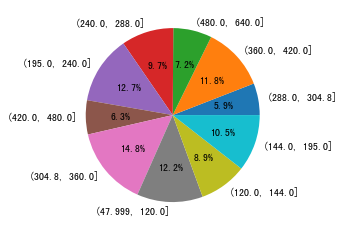

In [9]:
labels = dict2.keys()
pyplot.pie(dict2.values(),labels=labels,autopct='%.1f%%')
pyplot.show()

In [10]:
dict={}
for i in pd.qcut(df['最低年薪'],q=10):
    if(not (i in dict.keys())):
        dict[i]=1
    else:
        dict[i]=dict[i]+1
dict2={}

for key,value in dict.items():
    dict2[str(key)]=value

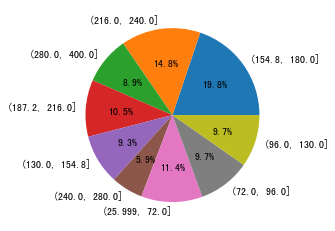

In [11]:
labels = dict2.keys()
pyplot.pie(dict2.values(),labels=labels,autopct='%.1f%%')
pyplot.show()

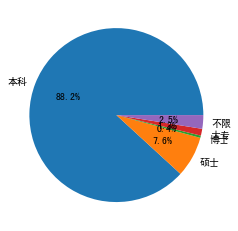

In [12]:
dict={}
for i in df['学历']:
    if not (i in dict.keys()):
        dict[i]=1
    else:
        dict[i]+=1
pyplot.pie(dict.values(),labels=dict.keys(),autopct='%.1f%%')
pyplot.show()

In [13]:
print("最低年薪最高:"+str(df['最低年薪'].max())+"         "+"最低年薪最低:"+str(df['最低年薪'].min())+"      "+"最低年薪中位数:"+str(df['最低年薪'].median())+"      "+"最低年薪众数:"+str(df['最低年薪'].mode())+"      "+"最低年薪均值:"+str(df['最低年薪'].mean()))

最低年薪最高:400         最低年薪最低:26      最低年薪中位数:180.0      最低年薪众数:0    180
dtype: int64      最低年薪均值:176.31223628691984


In [14]:
print("最高年薪最高:"+str(df['最高年薪'].max())+"         "+"最高年薪最低:"+str(df['最高年薪'].min())+"      "+"最高年薪中位数:"+str(df['最高年薪'].median())+"      "+"最高年薪众数:"+str(df['最高年薪'].mode())+"      "+"最高年薪均值:"+str(df['最高年薪'].mean()))

最高年薪最高:640         最高年薪最低:48      最高年薪中位数:288.0      最高年薪众数:0    360
dtype: int64      最高年薪均值:285.4599156118143
